In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import (mean_absolute_error, mean_squared_error,r2_score)
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv("Unemployment_dataset.csv")
df

,Year,Country,Gender,Age_Group,Education_Level,Residence_Area,Experience_Years,GDP_Growth_Rate,Inflation_Rate,Literacy_Rate,Interest_Rate,Unemployment_Rate
0,2016,India,Male,45-54,Postgraduate,Rural,9,6.94,4.07,98.12,7.59,6.49
1,2013,Australia,Female,18-24,No Formal,Urban,12,6.30,6.41,98.38,1.96,5.95
2,2022,UK,Male,45-54,Secondary,Rural,1,1.00,9.37,78.15,5.25,15.85
3,2024,South Africa,Female,18-24,No Formal,Urban,0,-1.80,11.22,96.09,9.36,17.12
4,2020,USA,Male,25-34,Primary,Urban,21,8.38,7.66,80.11,1.67,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2022,USA,Male,35-44,Undergraduate,Rural,30,8.65,5.52,69.11,9.03,2.47
8996,2012,Australia,Male,18-24,Undergraduate,Rural,18,-3.03,3.88,84.63,9.49,12.91
8997,2018,Japan,Male,35-44,No Formal,Rural,30,-2.23,3.71,65.92,3.66,10.47
8998,2019,USA,Male,45-54,Primary,Rural,29,-0.49,7.44,93.74,9.27,11.03


In [3]:
df.isnull().sum()

Year                 0
Country              0
Gender               0
Age_Group            0
Education_Level      0
Residence_Area       0
Experience_Years     0
GDP_Growth_Rate      0
Inflation_Rate       0
Literacy_Rate        0
Interest_Rate        0
Unemployment_Rate    0
dtype: int64

In [4]:
df.shape

(9000, 12)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9000 non-null   int64  
 1   Country            9000 non-null   object 
 2   Gender             9000 non-null   object 
 3   Age_Group          9000 non-null   object 
 4   Education_Level    9000 non-null   object 
 5   Residence_Area     9000 non-null   object 
 6   Experience_Years   9000 non-null   int64  
 7   GDP_Growth_Rate    9000 non-null   float64
 8   Inflation_Rate     9000 non-null   float64
 9   Literacy_Rate      9000 non-null   float64
 10  Interest_Rate      9000 non-null   float64
 11  Unemployment_Rate  9000 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 843.9+ KB


In [7]:
df.dtypes

Year                   int64
Country               object
Gender                object
Age_Group             object
Education_Level       object
Residence_Area        object
Experience_Years       int64
GDP_Growth_Rate      float64
Inflation_Rate       float64
Literacy_Rate        float64
Interest_Rate        float64
Unemployment_Rate    float64
dtype: object

In [8]:
df.head()

,Year,Country,Gender,Age_Group,Education_Level,Residence_Area,Experience_Years,GDP_Growth_Rate,Inflation_Rate,Literacy_Rate,Interest_Rate,Unemployment_Rate
0,2016,India,Male,45-54,Postgraduate,Rural,9,6.94,4.07,98.12,7.59,6.49
1,2013,Australia,Female,18-24,No Formal,Urban,12,6.30,6.41,98.38,1.96,5.95
2,2022,UK,Male,45-54,Secondary,Rural,1,1.00,9.37,78.15,5.25,15.85
3,2024,South Africa,Female,18-24,No Formal,Urban,0,-1.80,11.22,96.09,9.36,17.12
4,2020,USA,Male,25-34,Primary,Urban,21,8.38,7.66,80.11,1.67,4.47


In [9]:
df.tail()

,Year,Country,Gender,Age_Group,Education_Level,Residence_Area,Experience_Years,GDP_Growth_Rate,Inflation_Rate,Literacy_Rate,Interest_Rate,Unemployment_Rate
8995,2022,USA,Male,35-44,Undergraduate,Rural,30,8.65,5.52,69.11,9.03,2.47
8996,2012,Australia,Male,18-24,Undergraduate,Rural,18,-3.03,3.88,84.63,9.49,12.91
8997,2018,Japan,Male,35-44,No Formal,Rural,30,-2.23,3.71,65.92,3.66,10.47
8998,2019,USA,Male,45-54,Primary,Rural,29,-0.49,7.44,93.74,9.27,11.03
8999,2011,Brazil,Female,25-34,No Formal,Rural,23,8.41,11.75,71.98,2.95,5.36


In [10]:
df.columns

Index(['Year', 'Country', 'Gender', 'Age_Group', 'Education_Level',
       'Residence_Area', 'Experience_Years', 'GDP_Growth_Rate',
       'Inflation_Rate', 'Literacy_Rate', 'Interest_Rate',
       'Unemployment_Rate'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9000.0,2017.002889,4.327029,2010.0,2013.0000,2017.00,2021.0000,2024.00
Experience_Years,9000.0,20.071333,11.890368,0.0,10.0000,20.00,30.0000,40.00
GDP_Growth_Rate,9000.0,2.546196,3.763227,-4.0,-0.7225,2.57,5.8400,9.00
Inflation_Rate,9000.0,6.560482,3.166508,1.0,3.8400,6.57,9.3325,12.00
Literacy_Rate,9000.0,82.135822,9.880799,65.0,73.6600,82.00,90.8825,99.00
Interest_Rate,9000.0,5.479633,2.612555,1.0,3.2100,5.44,7.7700,10.00
Unemployment_Rate,9000.0,8.941910,3.716695,2.0,6.1500,8.88,11.6600,20.83


# EDA

## PAIRPLOT

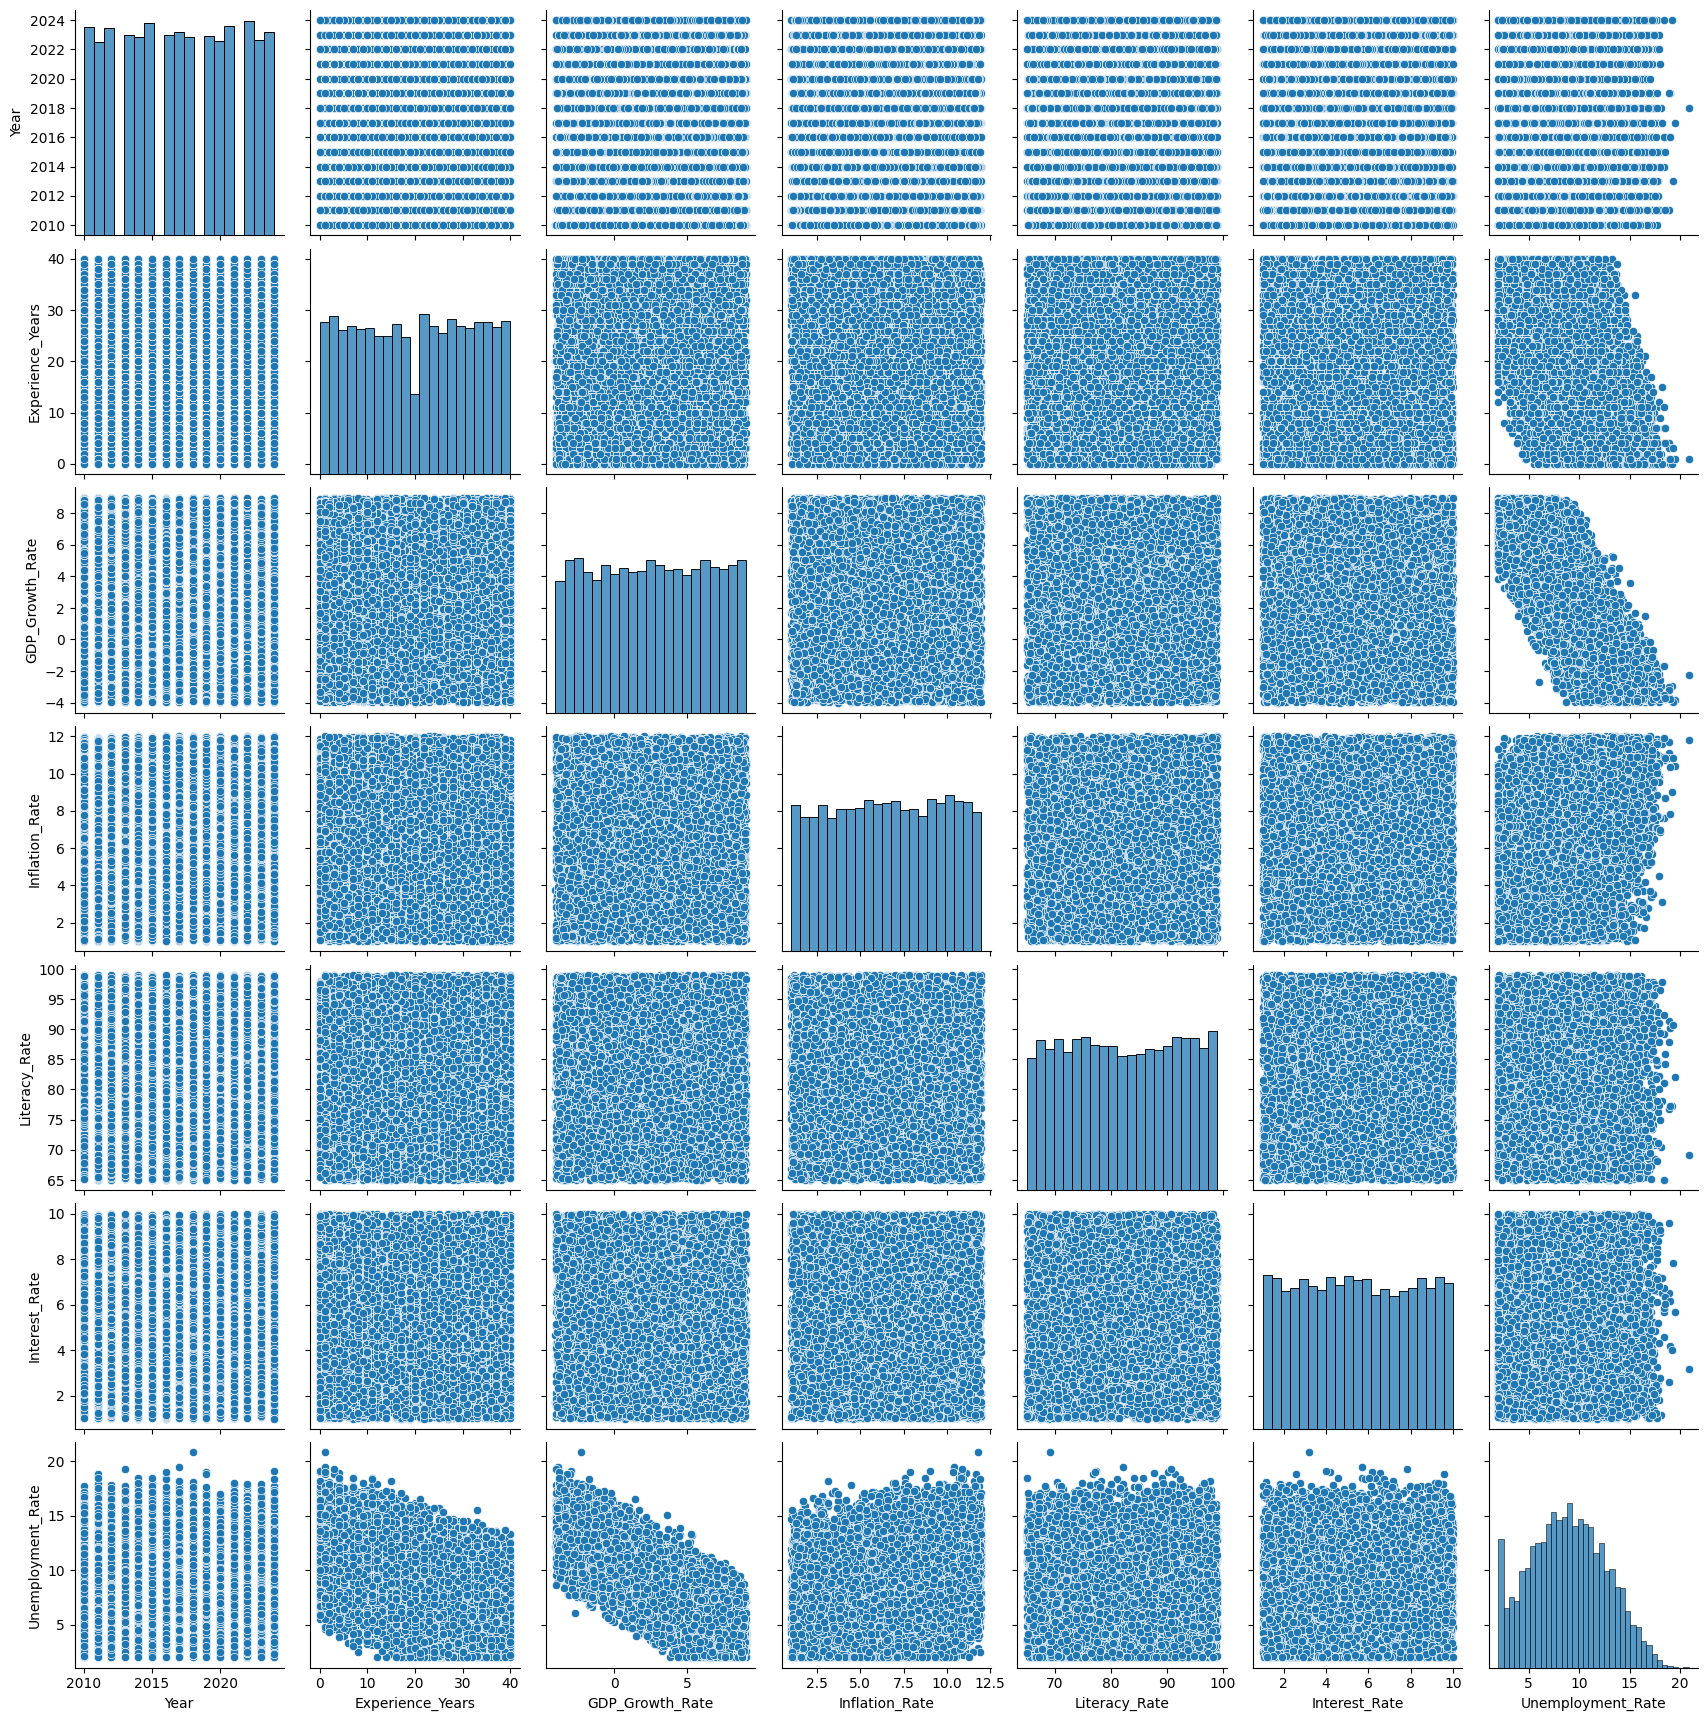

In [12]:
sns.pairplot(df)
plt.show()

## HISTPLOT

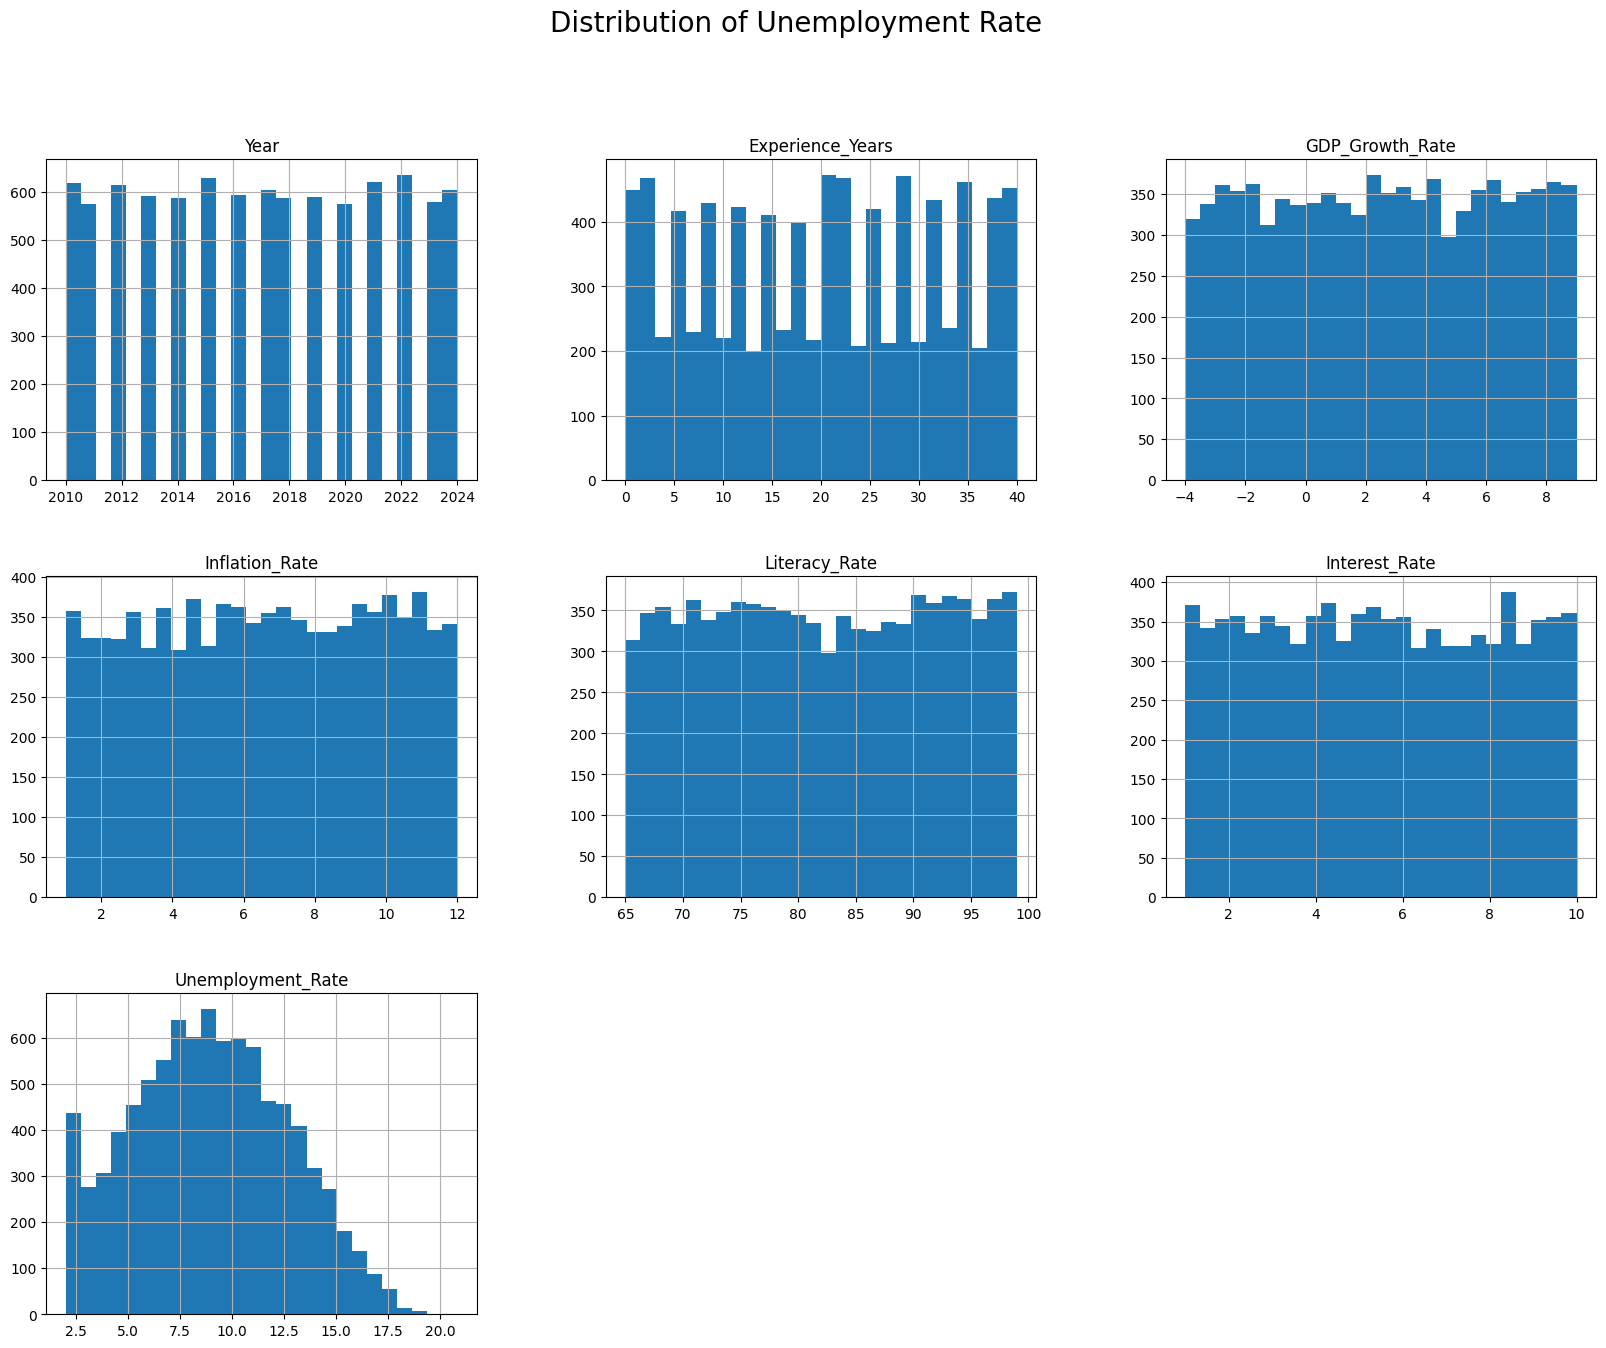

In [13]:
# HISTPLOT
df.hist(figsize=(20, 15), bins=26)
plt.suptitle("Distribution of Unemployment Rate", fontsize=20)
plt.show()

# HEATMAP(CORRELATION ANALYSIS)

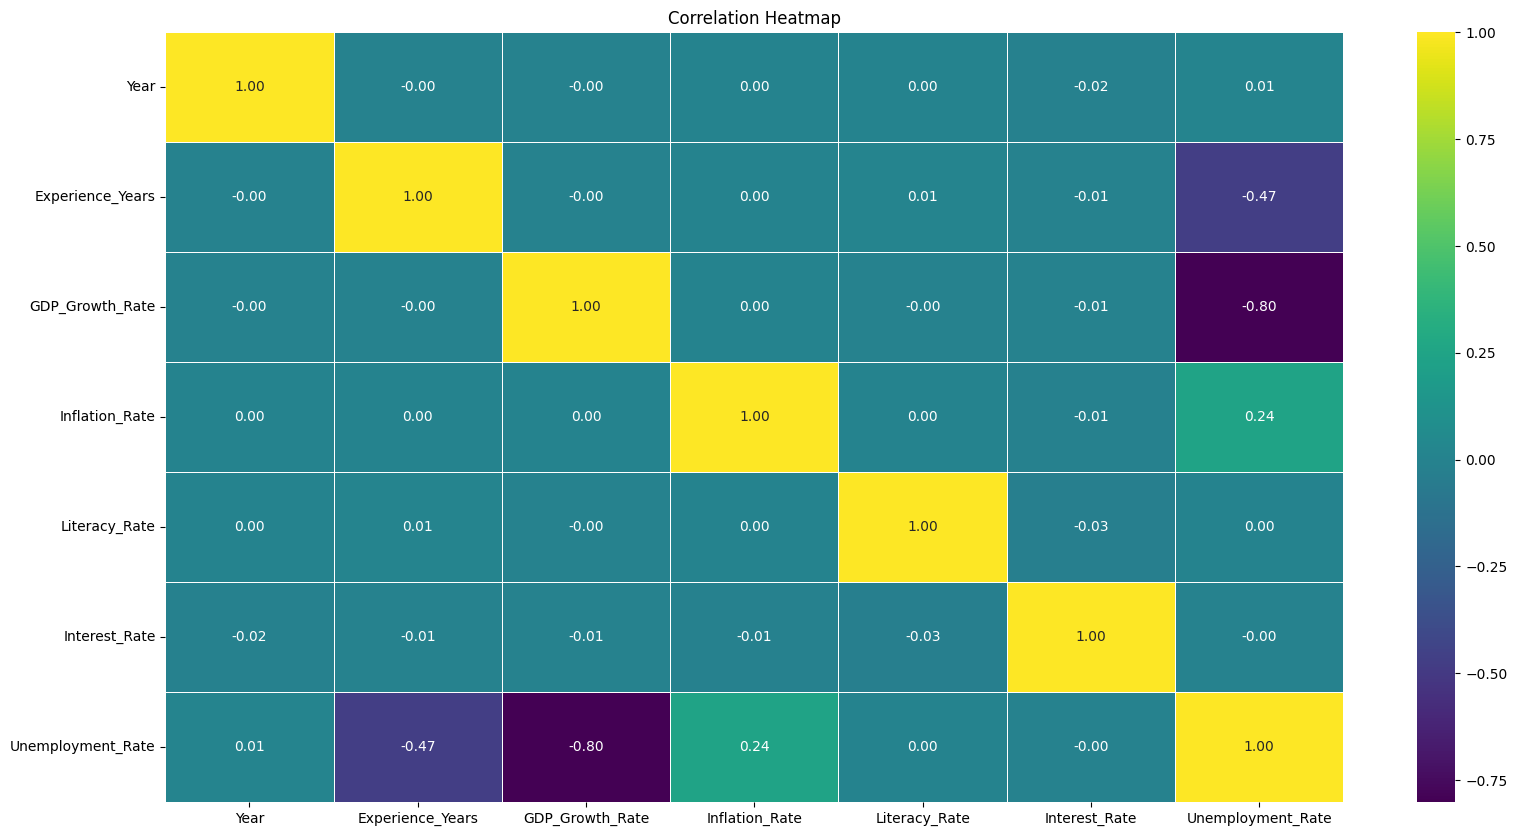

In [14]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(numeric_only=True), fmt=".2f", annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## BOXPLOT

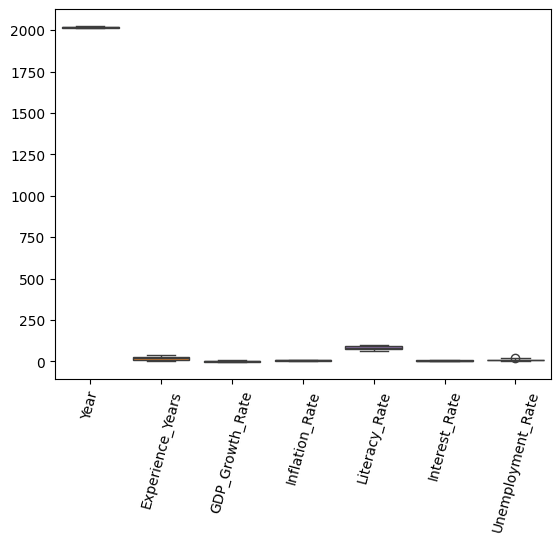

In [15]:
sns.boxplot(df)
plt.xticks(rotation=75.0)
plt.show()

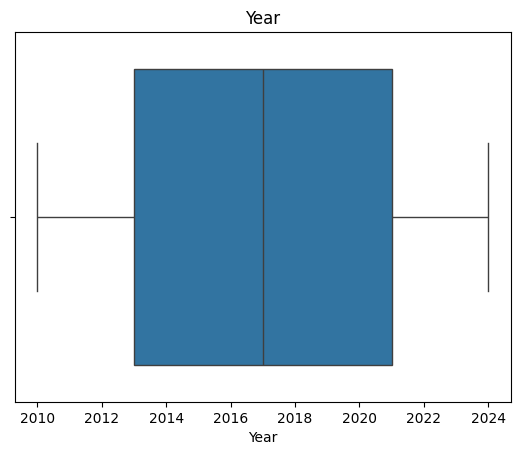

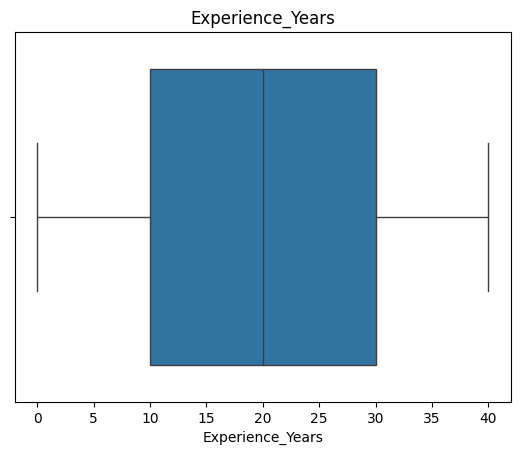

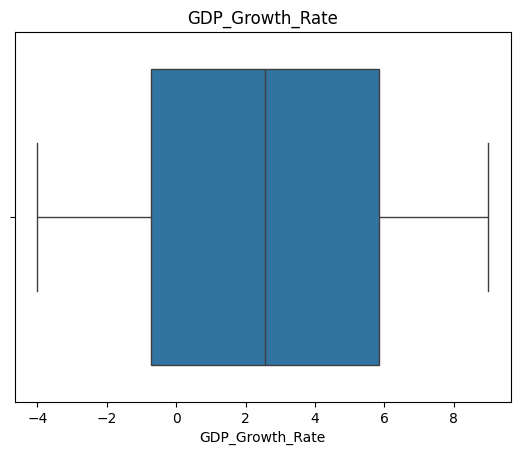

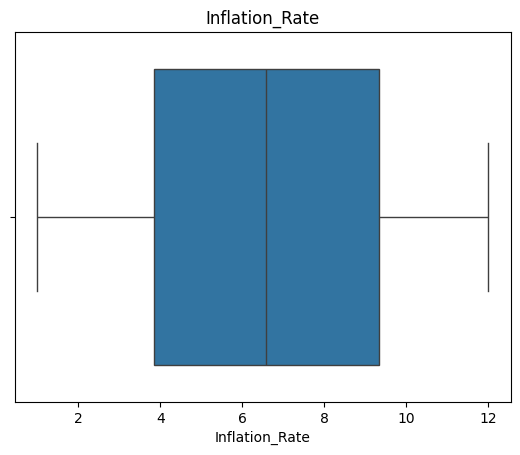

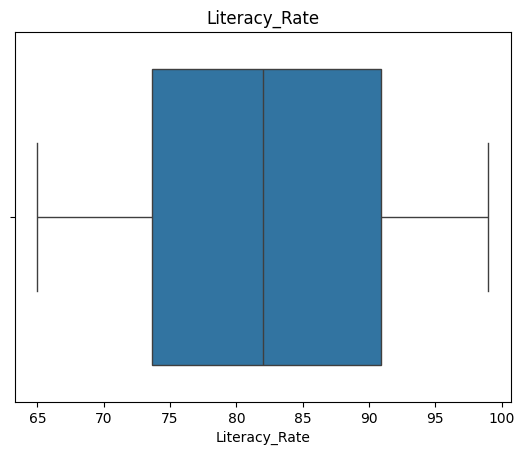

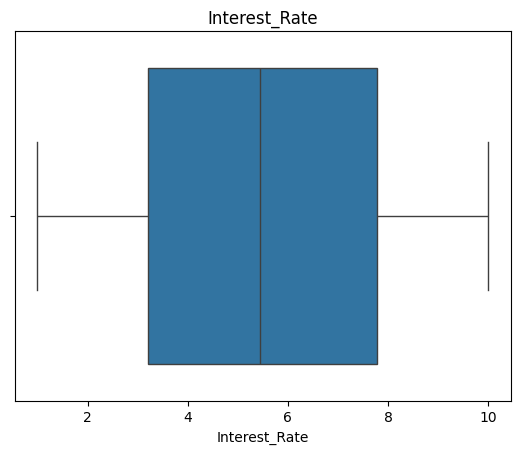

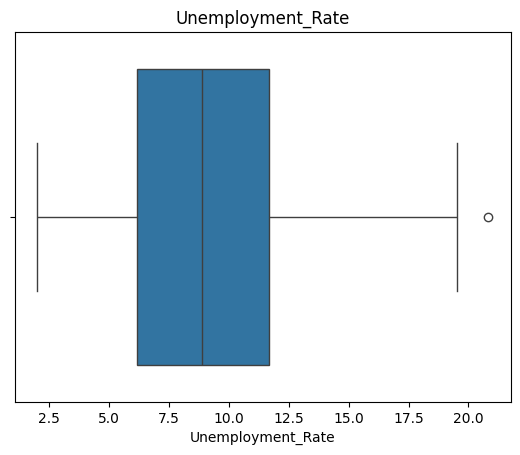

In [16]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

# Outlier Treatment

In [17]:
df

,Year,Country,Gender,Age_Group,Education_Level,Residence_Area,Experience_Years,GDP_Growth_Rate,Inflation_Rate,Literacy_Rate,Interest_Rate,Unemployment_Rate
0,2016,India,Male,45-54,Postgraduate,Rural,9,6.94,4.07,98.12,7.59,6.49
1,2013,Australia,Female,18-24,No Formal,Urban,12,6.30,6.41,98.38,1.96,5.95
2,2022,UK,Male,45-54,Secondary,Rural,1,1.00,9.37,78.15,5.25,15.85
3,2024,South Africa,Female,18-24,No Formal,Urban,0,-1.80,11.22,96.09,9.36,17.12
4,2020,USA,Male,25-34,Primary,Urban,21,8.38,7.66,80.11,1.67,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2022,USA,Male,35-44,Undergraduate,Rural,30,8.65,5.52,69.11,9.03,2.47
8996,2012,Australia,Male,18-24,Undergraduate,Rural,18,-3.03,3.88,84.63,9.49,12.91
8997,2018,Japan,Male,35-44,No Formal,Rural,30,-2.23,3.71,65.92,3.66,10.47
8998,2019,USA,Male,45-54,Primary,Rural,29,-0.49,7.44,93.74,9.27,11.03


In [18]:
# detect ouliers using IQR
Q1=df["Unemployment_Rate"].quantile(0.25)
Q3=df["Unemployment_Rate"].quantile(0.75)
IQR=Q3-Q1
# Define outlier Limits
lower_bound=Q1-1.5 * IQR
upper_bound=Q3+1.5 * IQR

In [19]:
# IQR method
df=df[(df['Unemployment_Rate']>= lower_bound)&(df["Unemployment_Rate"]<=upper_bound)]

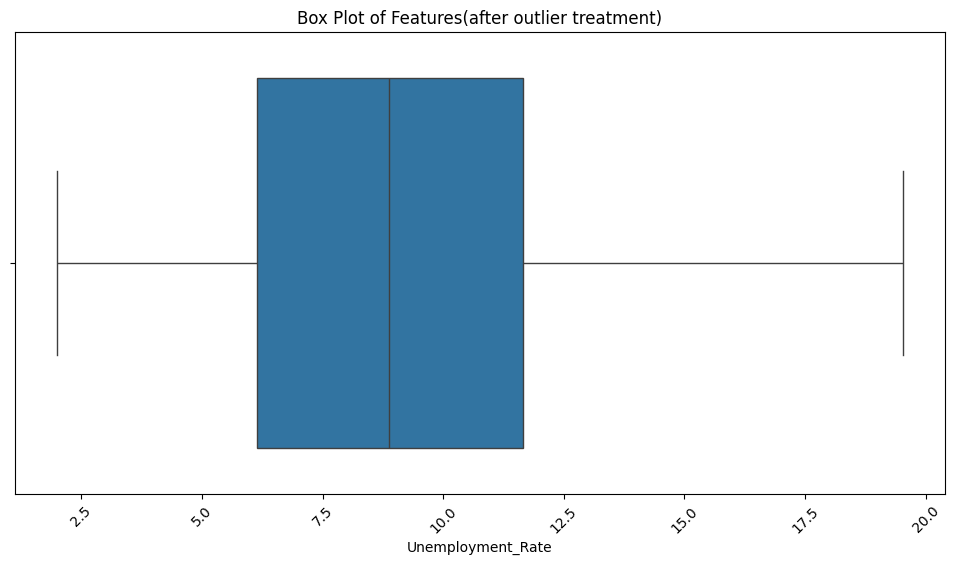

In [20]:
# apply capping (winsorization)
#df_capped= df["Unemployment_Rate"].clip(lower=lower_bound,upper=upper_bound)

# boxplot after capping
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Unemployment_Rate"])
plt.title("Box Plot of Features(after outlier treatment)")
plt.xticks(rotation=45)
plt.show()

<Axes: >

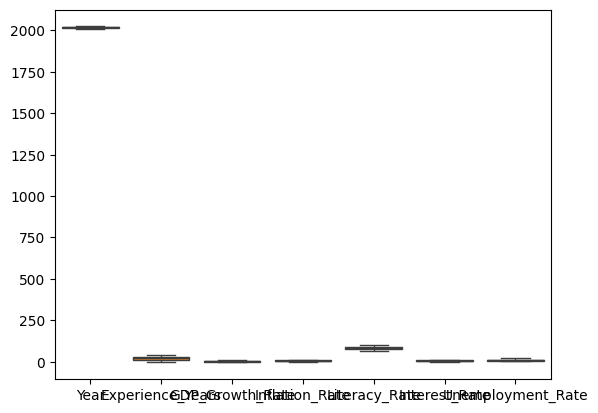

In [21]:
sns.boxplot(df)

# PREPROCESSING

In [22]:
df

,Year,Country,Gender,Age_Group,Education_Level,Residence_Area,Experience_Years,GDP_Growth_Rate,Inflation_Rate,Literacy_Rate,Interest_Rate,Unemployment_Rate
0,2016,India,Male,45-54,Postgraduate,Rural,9,6.94,4.07,98.12,7.59,6.49
1,2013,Australia,Female,18-24,No Formal,Urban,12,6.30,6.41,98.38,1.96,5.95
2,2022,UK,Male,45-54,Secondary,Rural,1,1.00,9.37,78.15,5.25,15.85
3,2024,South Africa,Female,18-24,No Formal,Urban,0,-1.80,11.22,96.09,9.36,17.12
4,2020,USA,Male,25-34,Primary,Urban,21,8.38,7.66,80.11,1.67,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2022,USA,Male,35-44,Undergraduate,Rural,30,8.65,5.52,69.11,9.03,2.47
8996,2012,Australia,Male,18-24,Undergraduate,Rural,18,-3.03,3.88,84.63,9.49,12.91
8997,2018,Japan,Male,35-44,No Formal,Rural,30,-2.23,3.71,65.92,3.66,10.47
8998,2019,USA,Male,45-54,Primary,Rural,29,-0.49,7.44,93.74,9.27,11.03


In [23]:
df.dtypes

Year                   int64
Country               object
Gender                object
Age_Group             object
Education_Level       object
Residence_Area        object
Experience_Years       int64
GDP_Growth_Rate      float64
Inflation_Rate       float64
Literacy_Rate        float64
Interest_Rate        float64
Unemployment_Rate    float64
dtype: object

In [24]:
le1=LabelEncoder()
df["Gender"]=le1.fit_transform(df["Gender"])

In [25]:
le2=LabelEncoder()
df["Age_Group"]=le2.fit_transform(df["Age_Group"])

In [26]:
le3=LabelEncoder()
df["Residence_Area"]=le3.fit_transform(df["Residence_Area"])

In [27]:
le4=LabelEncoder()
df["Country"]=le4.fit_transform(df["Country"])

In [28]:
#df["Country"]=df["Country"].map({"Australia":0,"UK":1,"USA":2,"India":3,"South Africa":4,"Germany":5,"Brazil":6,"Japan":7})

In [29]:
le5=LabelEncoder()
df["Education_Level"]=le5.fit_transform(df["Education_Level"])

In [30]:
#df["Education_Level"]=df["Education_Level"].map({"No Formal":0,"Primary":1,"Secondary":2,"Undergraduate":3,"Postgraduate":4})

In [31]:
df

,Year,Country,Gender,Age_Group,Education_Level,Residence_Area,Experience_Years,GDP_Growth_Rate,Inflation_Rate,Literacy_Rate,Interest_Rate,Unemployment_Rate
0,2016,3,1,3,1,0,9,6.94,4.07,98.12,7.59,6.49
1,2013,0,0,0,0,1,12,6.30,6.41,98.38,1.96,5.95
2,2022,6,1,3,3,0,1,1.00,9.37,78.15,5.25,15.85
3,2024,5,0,0,0,1,0,-1.80,11.22,96.09,9.36,17.12
4,2020,7,1,1,2,1,21,8.38,7.66,80.11,1.67,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2022,7,1,2,4,0,30,8.65,5.52,69.11,9.03,2.47
8996,2012,0,1,0,4,0,18,-3.03,3.88,84.63,9.49,12.91
8997,2018,4,1,2,0,0,30,-2.23,3.71,65.92,3.66,10.47
8998,2019,7,1,3,2,0,29,-0.49,7.44,93.74,9.27,11.03


In [32]:
x=df.drop("Unemployment_Rate",axis=1)
y=df["Unemployment_Rate"]

In [33]:
x

,Year,Country,Gender,Age_Group,Education_Level,Residence_Area,Experience_Years,GDP_Growth_Rate,Inflation_Rate,Literacy_Rate,Interest_Rate
0,2016,3,1,3,1,0,9,6.94,4.07,98.12,7.59
1,2013,0,0,0,0,1,12,6.30,6.41,98.38,1.96
2,2022,6,1,3,3,0,1,1.00,9.37,78.15,5.25
3,2024,5,0,0,0,1,0,-1.80,11.22,96.09,9.36
4,2020,7,1,1,2,1,21,8.38,7.66,80.11,1.67
...,...,...,...,...,...,...,...,...,...,...,...
8995,2022,7,1,2,4,0,30,8.65,5.52,69.11,9.03
8996,2012,0,1,0,4,0,18,-3.03,3.88,84.63,9.49
8997,2018,4,1,2,0,0,30,-2.23,3.71,65.92,3.66
8998,2019,7,1,3,2,0,29,-0.49,7.44,93.74,9.27


In [34]:
y

0        6.49
1        5.95
2       15.85
3       17.12
4        4.47
        ...  
8995     2.47
8996    12.91
8997    10.47
8998    11.03
8999     5.36
Name: Unemployment_Rate, Length: 8999, dtype: float64

# Train Test Split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# SCALING

In [36]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Linear Regression

In [37]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
print("Train Score:",linear_model.score(x_train,y_train))
print("Test Score",linear_model.score(x_test,y_test))
y_pred_linear=linear_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_linear)
mse=mean_squared_error(y_test,y_pred_linear)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_linear)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.9299627046671097
Test Score 0.9253611376698957
MAE: 0.8110592315519363
MSE: 1.0343372879187858
RMSE: 1.0170237400959654
R2 Score: 0.9253611376698957


In [39]:
y_pred_linear

array([ 6.15839095,  1.7902204 , 15.77346229, ..., 13.50993563,
        7.5338452 , 11.27320212], shape=(1800,))

## Regularization

### Lasso Regression

In [40]:
lasso=Lasso(alpha=1000)
lasso.fit(x_train,y_train)

,alpha,1000
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [41]:
print("Train Score:",lasso.score(x_train,y_train))
print("Test Score",lasso.score(x_test,y_test))
y_pred_lasso=lasso.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_lasso)
mse=mean_squared_error(y_test,y_pred_lasso)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_lasso)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.0
Test Score -0.000756850374919793
MAE: 3.0812259102344464
MSE: 13.868380280301281
RMSE: 3.7240274274367637
R2 Score: -0.000756850374919793


In [42]:
y_pred_lasso

array([8.96107376, 8.96107376, 8.96107376, ..., 8.96107376, 8.96107376,
       8.96107376], shape=(1800,))

### Ridge Regression

In [43]:
ridge=Ridge(alpha=1000)
ridge.fit(x_train,y_train)

,alpha,1000
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [44]:
print("Train Score:",ridge.score(x_train,y_train))
print("Test Score",ridge.score(x_test,y_test))
y_pred_ridge=ridge.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_ridge)
mse=mean_squared_error(y_test,y_pred_ridge)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_ridge)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.916055146929936
Test Score 0.9109301356197734
MAE: 0.8871723090880482
MSE: 1.2343205547651976
RMSE: 1.1109997996242833
R2 Score: 0.9109301356197734


In [45]:
y_pred_ridge

array([ 6.51554809,  2.67998868, 14.92871332, ..., 12.9424449 ,
        7.68416045, 10.9985178 ], shape=(1800,))

# Decision Tree 

In [46]:
dtree_model= DecisionTreeRegressor()
dtree_model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [47]:
print("Train Score:",dtree_model.score(x_train,y_train))
print("Test Score:",dtree_model.score(x_test,y_test))
y_pred_dtree=dtree_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_dtree)
mse=mean_squared_error(y_test,y_pred_dtree)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_dtree)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 1.0
Test Score: 0.8384691304633269
MAE: 1.1755333333333333
MSE: 2.2384773333333334
RMSE: 1.4961541810031924
R2 Score: 0.8384691304633269


In [48]:
y_pred_dtree

array([ 6.94,  3.14, 14.08, ..., 13.42,  7.07, 12.15], shape=(1800,))

# Random Forest 

In [49]:
forest_model= RandomForestRegressor(n_estimators=50,random_state=20)
forest_model.fit(x_train,y_train)


,n_estimators,50
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
print("Train Score:",forest_model.score(x_train,y_train))
print("Test Score",forest_model.score(x_test,y_test))
y_pred_forest=forest_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_forest)
mse=mean_squared_error(y_test,y_pred_forest)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_forest)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.9884801019562298
Test Score 0.9185283265992535
MAE: 0.8461105555555556
MSE: 1.129025645311111
RMSE: 1.0625561845432507
R2 Score: 0.9185283265992535


# K Nearest Neiughbor 

In [51]:
knn_model= KNeighborsRegressor()
knn_model.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
print("Train Score:",knn_model.score(x_train,y_train))
print("Test Score",knn_model.score(x_test,y_test))
y_pred_knn=knn_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_knn)
mse=mean_squared_error(y_test,y_pred_knn)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_knn)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.8780225496505878
Test Score 0.8254760335155326
MAE: 1.2503266666666666
MSE: 2.4185342666666667
RMSE: 1.555163742718646
R2 Score: 0.8254760335155326


# Support Vector Machine

In [53]:
from sklearn.svm import SVR

In [54]:
svm=SVR(kernel='linear')
svm.fit(x_train,y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [55]:
print("Train Score:",svm.score(x_train,y_train))
print("Test Score",svm.score(x_test,y_test))
y_pred_svm=svm.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_svm)
mse=mean_squared_error(y_test,y_pred_svm)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_svm)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.9299152048316885
Test Score 0.9255031562672056
MAE: 0.81022222771176
MSE: 1.032369209545273
RMSE: 1.0160557118314295
R2 Score: 0.9255031562672056


In [56]:
svm1=SVR(kernel='poly',degree=3,C=5,gamma='auto')  
svm1.fit(x_train,y_train)

,kernel,'poly'
,degree,3
,gamma,'auto'
,coef0,0.0
,tol,0.001
,C,5
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [57]:
print("Train Score:",svm1.score(x_train,y_train))
print("Test Score",svm1.score(x_test,y_test))
y_pred_svm1=svm1.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_svm1)
mse=mean_squared_error(y_test,y_pred_svm1)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_svm1)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.9303778333242797
Test Score 0.9201442636017131
MAE: 0.8327828446230269
MSE: 1.1066321649659867
RMSE: 1.0519658573195172
R2 Score: 0.9201442636017131


In [58]:
svm2=SVR(kernel='sigmoid')
svm2.fit(x_train,y_train)

,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [59]:
print("Train Score:",svm2.score(x_train,y_train))
print("Test Score:",svm2.score(x_test,y_test))
y_pred_svm2=svm2.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_svm2)
mse=mean_squared_error(y_test,y_pred_svm2)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_svm2)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: -3.7421694426051424
Test Score: -2.761645060113439
MAE: 5.861159773112003
MSE: 52.12847072056109
RMSE: 7.220004897544121
R2 Score: -2.761645060113439


In [60]:
svm3=SVR(kernel='rbf')
svm3.fit(x_train,y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [61]:
print("Train Score:",svm3.score(x_train,y_train))
print("Test Score:",svm3.score(x_test,y_test))
y_pred_svm3=svm3.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_svm3)
mse=mean_squared_error(y_test,y_pred_svm3)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_svm3)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.9335675641753509
Test Score: 0.9168548183671452
MAE: 0.855306621828975
MSE: 1.1522169415349617
RMSE: 1.0734136861131227
R2 Score: 0.9168548183671452


In [62]:
svm4=SVR()
svm4.fit(x_train,y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [63]:
print("Train Score:",svm4.score(x_train,y_train))
print("Test Score:",svm4.score(x_test,y_test))
y_pred_svm4=svm4.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_svm4)
mse=mean_squared_error(y_test,y_pred_svm4)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_svm4)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.9335675641753509
Test Score: 0.9168548183671452
MAE: 0.855306621828975
MSE: 1.1522169415349617
RMSE: 1.0734136861131227
R2 Score: 0.9168548183671452


# Ensemple Models

## Adaboost

In [64]:
adaboost=AdaBoostRegressor(n_estimators=50,learning_rate=0.3,random_state=1)
adaboost.fit(x_train,y_train)

,estimator,None
,n_estimators,50
,learning_rate,0.3
,loss,'linear'
,random_state,1


In [65]:
print("Train Score:",adaboost.score(x_train,y_train))
print("Test Score:",adaboost.score(x_test,y_test))
y_pred_adaboost=adaboost.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_adaboost)
mse=mean_squared_error(y_test,y_pred_adaboost)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_adaboost)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.8814886800363246
Test Score: 0.8775790893899121
MAE: 1.0434421576130732
MSE: 1.6964957491576687
RMSE: 1.3024959689602378
R2 Score: 0.8775790893899121


## Gradient Boost

In [66]:
grad_model=GradientBoostingRegressor(n_estimators=100,learning_rate=0.01,random_state=25)
grad_model.fit(x_train,y_train)

,loss,'squared_error'
,learning_rate,0.01
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [67]:
print("Train Score:",grad_model.score(x_train,y_train))
print("Test Score:",grad_model.score(x_test,y_test))
y_pred_grad=grad_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_grad)
mse=mean_squared_error(y_test,y_pred_grad)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_grad)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.7171283230233344
Test Score: 0.7145682573188392
MAE: 1.6099843847506907
MSE: 3.95548224335257
RMSE: 1.9888394212084017
R2 Score: 0.7145682573188392


## XG Boost

In [68]:
xg_model=XGBRegressor()
xg_model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [69]:
print("Train Score:",xg_model.score(x_train,y_train))
print("Test Score:",xg_model.score(x_test,y_test))
y_pred_xg=xg_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_xg)
mse=mean_squared_error(y_test,y_pred_xg)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_xg)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

Train Score: 0.9822626713491864
Test Score: 0.9091016480881189
MAE: 0.899517320754793
MSE: 1.2596595373734853
RMSE: 1.1223455516789316
R2 Score: 0.9091016480881189


# Hyperparameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# LINEAR REGRESSION
#-------------------
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Linear Regression Score:", lr.score(x_test, y_test))

Linear Regression Score: 0.9253611376698957


In [72]:
# LINEAR REGRESSION
#--------------------------
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5)
grid_lr.fit(x_train, y_train)


,estimator,LinearRegression()
,param_grid,"{'fit_intercept': [True, False], 'positive': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,fit_intercept,True


In [73]:
print("Best Linear Regression Params:", grid_lr.best_params_)
print("Best Linear Regression Score:", grid_lr.best_score_)

Best Linear Regression Params: {'fit_intercept': True, 'positive': False}
Best Linear Regression Score: 0.9295463041771589


In [74]:
# DECISION TREE REGRESSION
#--------------------------
param_grid_dt = {
    'max_depth': [3, 5, 8, 12],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'friedman_mse']
}
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5)
grid_dt.fit(x_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [75]:
print("Best DT Params:", grid_dt.best_params_)
print("Best DT Score:", grid_dt.best_score_)

Best DT Params: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 5}
Best DT Score: 0.8968882739112273


In [76]:
# K NEIGHBORS REGRESSION
#------------------------
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
grid_knn.fit(x_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,11


In [77]:
print("Best KNN Params:", grid_knn.best_params_)
print("Best KNN Score:",grid_knn.best_score_)

Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best KNN Score: 0.8312253349277133


In [78]:
#RANDOM FOREST REGRESSION
#-------------------------
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_rf.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [79]:
print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)

Best RF Params: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 200}
Best RF Score: 0.9221795028343575


In [80]:
# ADABOOST REGRESSION
#---------------------
param_grid_ab = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square']
}
grid_ab = GridSearchCV(AdaBoostRegressor(), param_grid_ab, cv=5)
grid_ab.fit(x_train, y_train)

,estimator,AdaBoostRegressor()
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'loss': ['linear', 'square'], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [81]:
print("Best AB Params:", grid_ab.best_params_)
print("Best AB Score:", grid_ab.best_score_)

Best AB Params: {'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 150}
Best AB Score: 0.9044988364219924


In [82]:
# GRADIENT BOSST REGRESSION
#---------------------------
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5)
grid_gb.fit(x_train, y_train)

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.05, 0.1, ...], 'max_depth': [3, 5], 'n_estimators': [100, 200]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [83]:
print("Best GB Params:", grid_gb.best_params_)
print("Best GB Score:", grid_gb.best_score_)

Best GB Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best GB Score: 0.9262596933318639


In [84]:
# XGBOOST REGRESSION
#-------------------
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 6]
}
grid_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb, cv=5)
grid_xgb.fit(x_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [85]:
print("Best XGB Params:", grid_xgb.best_params_)
print("Best XGB Score:", grid_xgb.best_score_)

Best XGB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best XGB Score: 0.9260650679915079


In [86]:
# SUPPORT VECTOR REGRESSION
# --------------------------
from sklearn.svm import SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=5)
grid_svr.fit(x_train, y_train)

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [87]:
print("Best SVR Params:", grid_svr.best_params_)
print("Best SVR Score:", grid_svr.best_score_)

Best SVR Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVR Score: 0.9295249568374526


In [88]:
models = {'Linear Regression': grid_lr,'DT': grid_dt,'KNN': grid_knn,'Random Forest': grid_rf,'AB':grid_ab,'GB':grid_gb,'SVM':grid_svr}
models["XGB"]=grid_xgb
for name, grid in models.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f" Best Params: {grid.best_params_}")
    print(f" R2 score: {r2:.4f}\n")

Linear Regression:
 Best Params: {'fit_intercept': True, 'positive': False}
 R2 score: 0.9254

DT:
 Best Params: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 5}
 R2 score: 0.9039

KNN:
 Best Params: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
 R2 score: 0.8347

Random Forest:
 Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 200}
 R2 score: 0.9215

AB:
 Best Params: {'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 150}
 R2 score: 0.9016

GB:
 Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
 R2 score: 0.9247

SVM:
 Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
 R2 score: 0.9255

XGB:
 Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
 R2 score: 0.9209



In [89]:
# Access the best model
best_svm_model =grid_svr.best_estimator_
y_pred = best_svm_model.predict(x_test)

In [90]:
print(best_svm_model)

SVR(C=1, kernel='linear')


# save file

In [91]:
import joblib

In [92]:
joblib.dump(best_svm_model,"best_model.pkl")

['best_model.pkl']

In [93]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [94]:
joblib.dump(le1,"le1.pkl")

['le1.pkl']

In [95]:
joblib.dump(le2,"le2.pkl")


['le2.pkl']

In [96]:
joblib.dump(le3,"le3.pkl")


['le3.pkl']

In [97]:
joblib.dump(le4,"le4.pkl")

['le4.pkl']

In [98]:
joblib.dump(le5,"le5.pkl")

['le5.pkl']

In [99]:
from PIL import Image
img=Image.open(r"C:\Users\Afees\OneDrive\Desktop\DS\ML\ml project\Essay-on-Unemployment.webp")